In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import classification_report 


In [ ]:
from tensorflow import keras
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
ytrain[0]

5

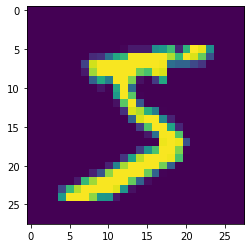

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
# scaling is required so min max scalar used and not std scalar coz of megative value (range=0-255)

xtrain=xtrain/255

In [ ]:
xtest=xtest/255

In [ ]:
#values converted btwn 0 and 1 for easy computation
xtest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=25,validation_split=0.20)

Epoch 1/25
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3387 - accuracy: 0.8967 - val_loss: 0.1580 - val_accuracy: 0.9558
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1361 - accuracy: 0.9600 - val_loss: 0.1240 - val_accuracy: 0.9649
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0960 - accuracy: 0.9713 - val_loss: 0.1119 - val_accuracy: 0.9678
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0732 - accuracy: 0.9773 - val_loss: 0.0975 - val_accuracy: 0.9719
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0941 - val_accuracy: 0.9720
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.1104 - val_accuracy: 0.9699
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.1005 - val_accurac

In [ ]:
yprob=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
yprob[0]

array([1.0310921e-19, 3.5340884e-14, 1.8416429e-12, 9.1789194e-11,
       2.7337990e-21, 2.2957372e-16, 2.6041524e-23, 9.9999994e-01,
       2.4505468e-14, 1.8083243e-13], dtype=float32)

In [ ]:
ypred=yprob.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.94      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

